In [8]:
#loading of the data set
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
from scripts import project_function
df = project_function.loadWine("C:\\Users\\harsh\\Documents\\Data301\\course-project-solo_201\\data\\raw\\whitewine.xlsx")
print(df.isnull().any())
#shows so no null values





fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [34]:
#EDA Start
#decribes details about all the columns 
df.describe()




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<AxesSubplot:>

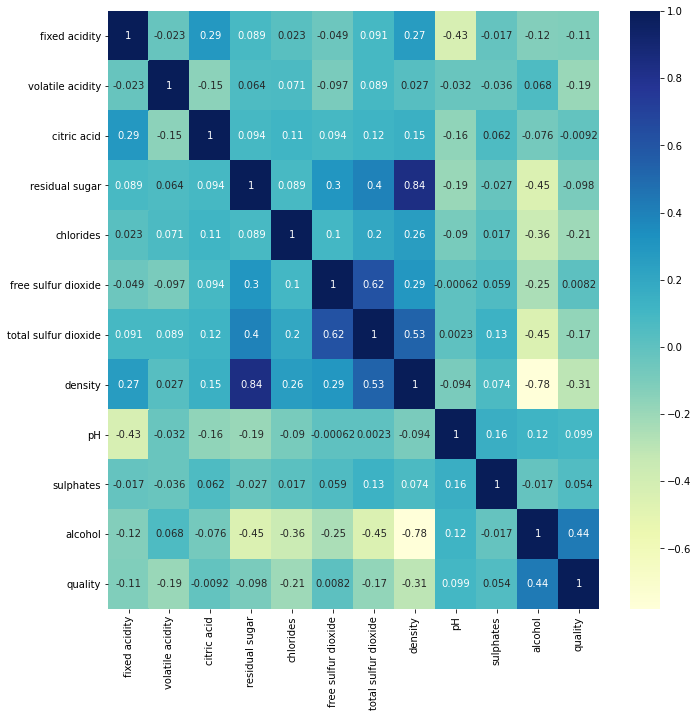

In [9]:
#heat map to see the correlation between each type

plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")


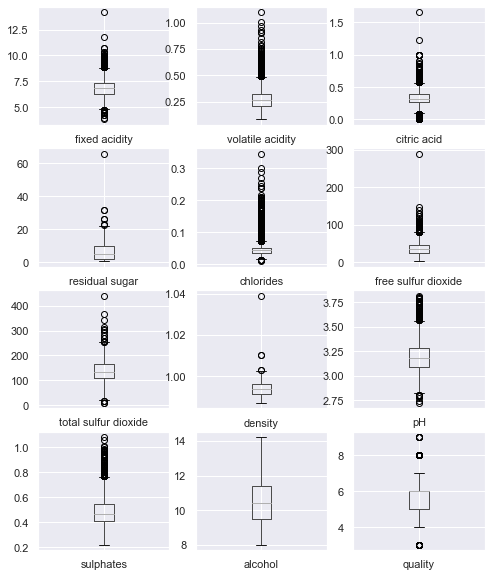

In [35]:
#finding any outliers using box plot
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide'
           , 'total sulfur dioxide', 'density', 'pH','sulphates','alcohol', 'quality']

plt.figure(figsize=(8,10))
for i in range(0, 12):
    plt.subplot(4,3,i+1)
    df.boxplot(columns[i])




#The boxplot below shows us there our many outliers in our data not as much in the citric acid, quality and alcohol columns,
#however this can cause a negative effect on analysis so we must remove them



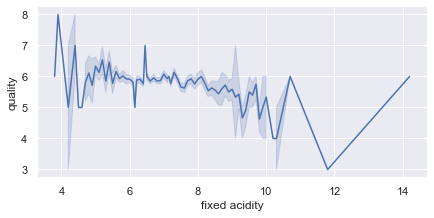

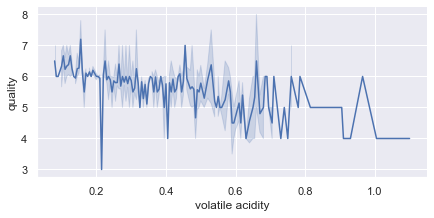

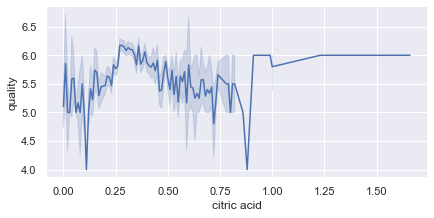

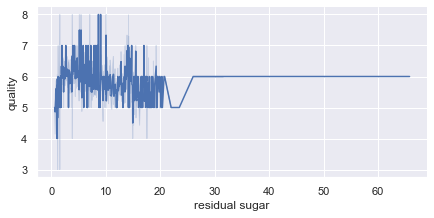

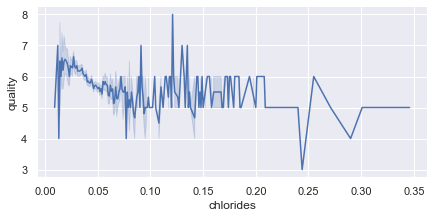

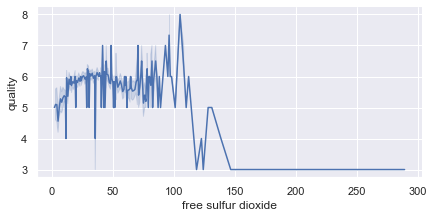

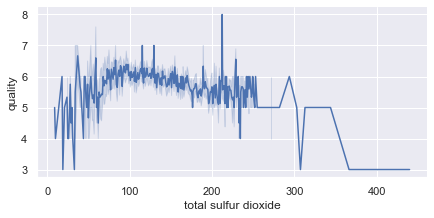

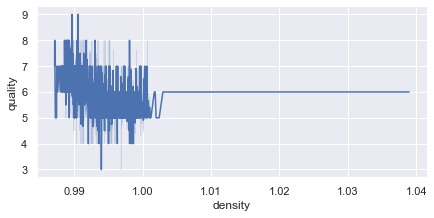

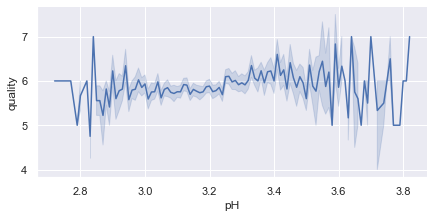

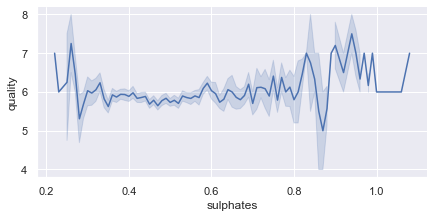

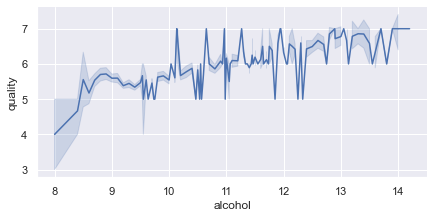

In [16]:
#before removing outliers
columnss = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide'
           , 'total sulfur dioxide', 'density', 'pH','sulphates','alcohol']

for i in range(0, 11):
    sns.set()
    sns.relplot(data = df, x=columnss[i],y='quality', kind='line', height = 3, aspect=2)


In [11]:
#removing outliers 

dfout = project_function.removeOut(df)

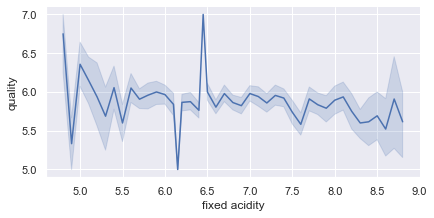

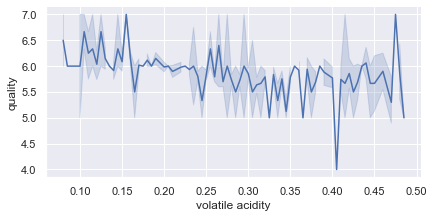

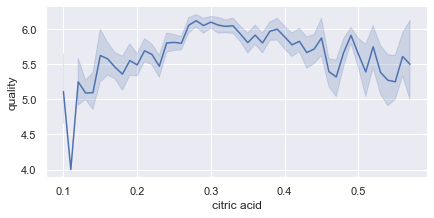

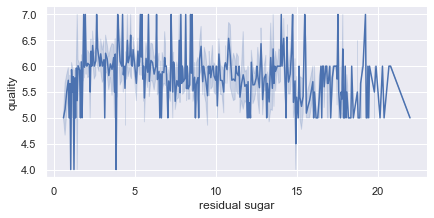

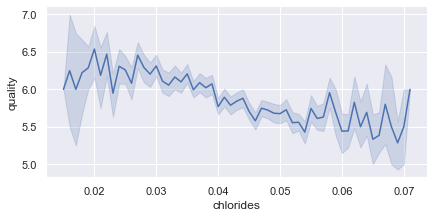

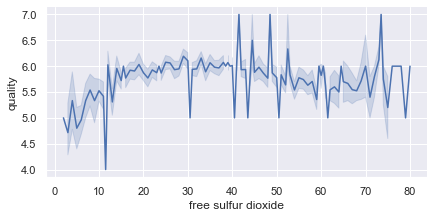

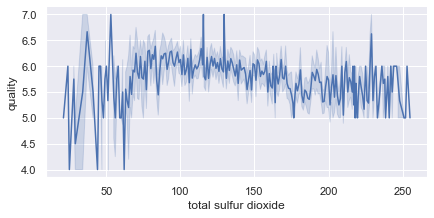

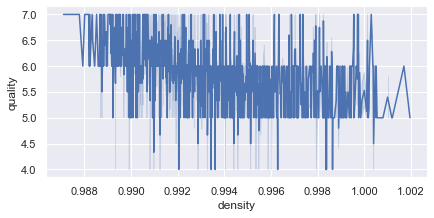

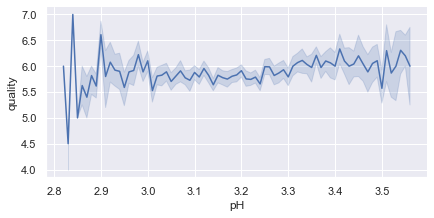

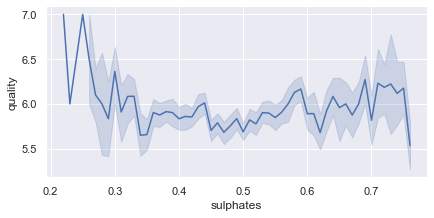

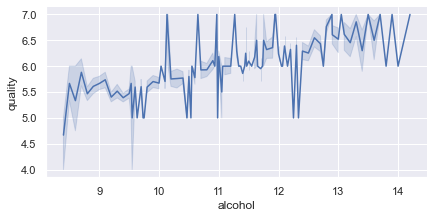

In [36]:
#replot after removing outliers
#comparing the two replots you can see how much better and accurate the plots look after removing the outliers

for i in range(0, 11):
    sns.set()
    sns.relplot(data = dfout, x=columnss[i],y='quality', kind='line', height = 3, aspect=2)

### Relplot findings
**helps see that this model is linear**

**residual sugar** plot shows many spikes in quality this due to the residual sugar being depended on the acidity(positive correlation).as wine tastes good when it has a great balance between sweet and sour(acidity)

**citric acid** - the replot shows us that quality is low when citric acid level are also low this due to citric acid being able
#prevent certain types of bacteria growth. citric acid also adds a fresh taste, however too much can end up runing the taste e.g low quality.

**the two sulfur dioxide replots** - is somewhat even throughout the amounts, however since sulfur dioxide is used to kill off
bacteria growth and yeast too little can be linked to low quality this shown in the free sulfur dioxide replot.

**sulphates** - helps perserve the wine and can effect the taste by making it more sharp. low amounts of sulphates have a higher quality due to higher amounts being able to change the color and taste of the wine. this is shown in the replot.

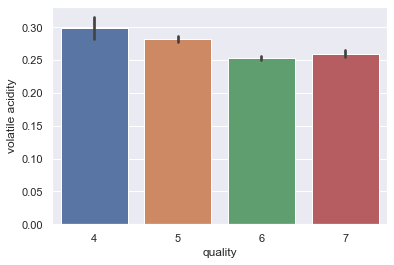

In [62]:
sns.barplot(x='quality', y='volatile acidity', data=dfout)
plt.show()

#an increase in volatile acidity is associated with a decrease in quality due to  a higher level indicating wine spoilage and 
#it can give off a bad smell

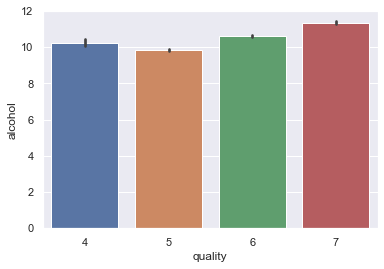

In [61]:

sns.barplot(x='quality', y='alcohol', data=dfout)
plt.show()

#the barplot also the relplot help show that a higher content of alcohol leads to a higher quality possibly due to the tasters 
#perfering wine that makes feel more buzzed 

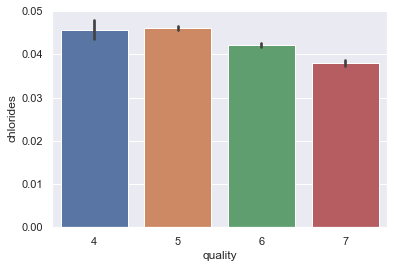

In [60]:
sns.barplot(x='quality', y='chlorides', data=dfout)
plt.show()
#lower levels of chlorides have a higher quality because high level of chlorides can give the wine too much of a salty taste

<AxesSubplot:>

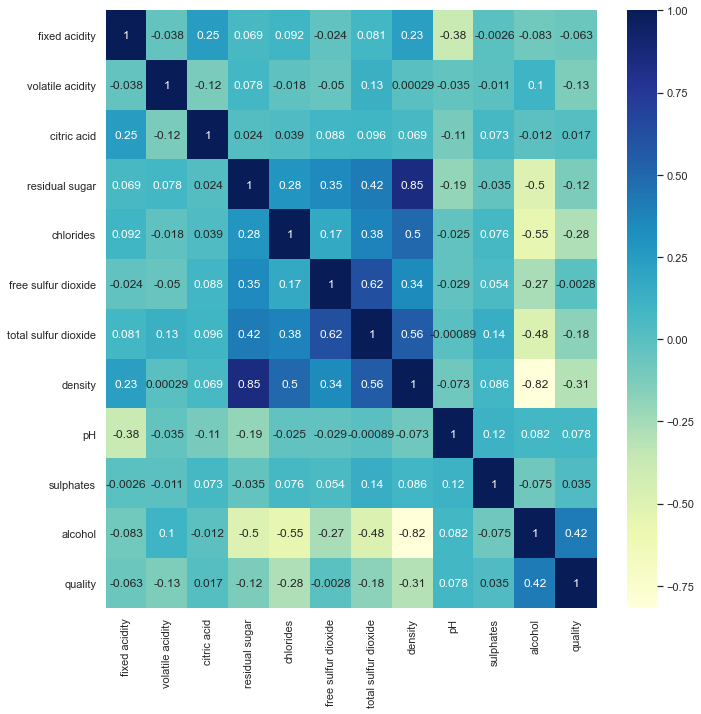

In [27]:
#looking at correlation with outliners removed
plt.figure(figsize=(11,11))
sns.heatmap(dfout.corr(), annot = True, cmap="YlGnBu")

## Revised Research Questions
**Q1. What elements play a big role in influencing the taste(quality) of wine?**

**Q2. What elements have a small role in influencing the taste(quality) of wine?**



### Findings
>**Q1** - According to our analysis the element that had the biggest affect on taste was alcohol, which is very interesting.
Alcohol had the biggest positive correlation with quality because most people who consume wine do it for the effects of alcohol, so wine with a low alcohol content wouldn't be of interest to most people. *Sulphates*, *Sulfhur dioxide* and *citric acid* all have an affect on perserving the quality of wine, but *Sulphates* and *Citric acid* affect taste as well. The relplot shows that a low amount *Sulphates* leads to a higher quality and for *Citric acid* the amount needs to be in a specific range not too high or low to increase the quality. *Volatile acidity* indicates if wine has gone bad, it is negatively correlated with quality so a low amount leads to higher quality. Lastly, *chlorides* also have a big affect on quality as expressed on the barplot and replot low chloride levels steer towards a higher quality and high chloride levels tend to do the opposite.


>**Q2** - Our analysis shows that *pH*, *fixed acidity* and *density have the smallest influence on the quality of wine.
The *pH*  shows the level of acidity of wine and it is close to be consistent between levels of *pH* judging off the relplot. *Density* has a somewhat consistent pattern but lower levels seem to have a higher quality judging off the relplot; high amounts of *Density* is positively correlated **(0.85)** with *residual sugar* so its possible higher density's cause the wine to have a bit too sweet of a taste. *Fixed acidity* is close to have anying a consistent pattern with each amount compared to quality thus it will not have a big affect. *Residual sugar* adds sweetness to wine too little of this can lead to a lower quality as seen in the relplo;, however the pattern remains the same throughout the increased amounts accordingly to our data it shouldn't have a big role on the quality as well.
